Who was most likely to survived the Titanic?  Is it the same for everyone or did the saying "Women and children first" hold true?
My null hypothosis is that sex, age, and class did not significantly correlate when considering likelyhood of survival on the titanic.
The null hypothosis is that Women, children and being of a higher class increased the correlation to survival.

1. I will explore the data and look for missing values and unusual data types, and look at over all statistics.
2. I will clean it of entries where there are missing values for my main variables Sex, Age & class.
3. I will create histograms to see what kind of distributions exist for Age.
4. I will group certain data (by age group) so that I can compare children, adults, and those over 50 and create groups for each sex (male, female) and each class (1,2,3).
5. I will do cross tabs for survival and each of my independant variables so that I can see counts.
6. I will perform the Chi squared test  assess correlation of Sex, Age Group, and Class on survival.  
7. I will compare and visualized the groups to demonstrate which categories were most likely to survive.
8. I will list the three independant variables which appear to correlate to survival the most, and it will be the person who has all three of these that is most correlated to survival.

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
titanic_df = pd.read_csv('titanic-data.csv')

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [2]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looking at the tables above, I see that we are missing almost 200 entries in the Age column. This will make age a little less statistically useful compared to the categories of sex and ticket class.  We also see that the vast majority of cabin numbers are missing.  And, that we are missing 2 embarkation entries.  For the purpose of this analysis, I will ignore embarkation.  However, because I want to include age category as a independant variable, I am going to take a sub-set of the data which does not include anyone who's age is not entered.  

In [5]:
# Taking out entries where there is no age.
titanic_df['Age'] = titanic_df['Age'].astype('float64')


titanic_df.dropna(axis=0, subset = ['Age'], inplace=True)

pd.set_option('precision', 2)

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.00,714.00,714.00,714.00,714.00,714.00,714.00
mean,448.58,0.41,2.24,29.70,0.51,0.43,34.69
std,259.12,0.49,0.84,14.53,0.93,0.85,52.92
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,222.25,0.00,1.00,20.12,0.00,0.00,8.05
50%,445.00,0.00,2.00,28.00,0.00,0.00,15.74
75%,677.75,1.00,3.00,38.00,1.00,1.00,33.38
max,891.00,1.00,3.00,80.00,5.00,6.00,512.33


,Age
count,714.00
mean,29.70
std,14.53
min,0.42
25%,20.12
50%,28.00
75%,38.00
max,80.00


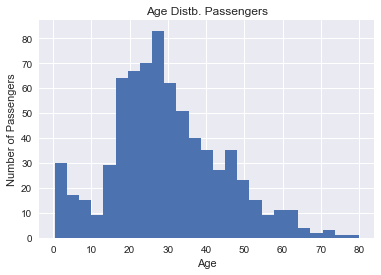

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

ax = titanic_df['Age'].hist(bins = (25))
ax.set_ylabel('Number of Passengers')
ax.set_xlabel('Age')
ax.set_title('Age Distb. Passengers')
pd.DataFrame(titanic_df['Age'].describe())


From this histogram, we see that the data is almost normally distributed, but it show there are more people under 20 than over 60. We also see that the largest bin is 20-30 year olds.  This helps me determine the ages I want to use for my age groups(children, adults, elderly).  Below, I will compate this histogram to the same one for people who survived only.

In [29]:
survived = titanic_df[titanic_df.Survived == 1].copy()

,Age
count,290.00
mean,28.34
std,14.95
min,0.42
25%,19.00
50%,28.00
75%,36.00
max,80.00


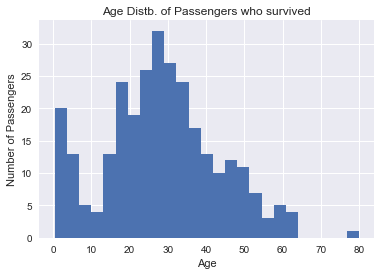

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

ax = survived['Age'].hist(bins = (25))
ax.set_ylabel('Number of Passengers')
ax.set_xlabel('Age')
ax.set_title('Age Distb. of Passengers who survived')
pd.DataFrame(survived['Age'].describe())


Comparing the three above histogram to the one for the overall sample, we see a noticable gap that shows there are almost no survivors of people 63 and over. And, it seems that if children are very young, about less than 7, the survival is much better than for those about 7-14.  This is probably because children under 7 are almost always with their parents or caretaker.

Using what we learned about age distributions above, I will create 4 categories: children under 7, children 7-14, adults 15-58 and 58 and over (seniors). #I later went back and adjusted this so that there were over 30 teens in the group teens.

In [107]:
    # Filter by age, make a copy, and save as a new dataframe for each age bracket
young_children = titanic_df[titanic_df.Age < 7].copy()
teens = titanic_df[(titanic_df.Age >= 7) & (titanic_df.Age < 16)].copy() 
adults = titanic_df[(titanic_df.Age >= 16) & (titanic_df.Age < 58)].copy()  
seniors = titanic_df[titanic_df.Age >= 58].copy() 

In [108]:
print young_children.count()

PassengerId    47
Survived       47
Pclass         47
Name           47
Sex            47
Age            47
SibSp          47
Parch          47
Ticket         47
Fare           47
Cabin          10
Embarked       47
dtype: int64


Checking that I have at least 30 values for Chi squared test.

In [111]:
print teens.count()

PassengerId    36
Survived       36
Pclass         36
Name           36
Sex            36
Age            36
SibSp          36
Parch          36
Ticket         36
Fare           36
Cabin           3
Embarked       36
dtype: int64


It looks like I need to expand the teen age bracket to get more than 30 results for the chi squared test.

In [112]:
# recount teens to include up to 16 yrs old instead of 15
print teens.count()

PassengerId    36
Survived       36
Pclass         36
Name           36
Sex            36
Age            36
SibSp          36
Parch          36
Ticket         36
Fare           36
Cabin           3
Embarked       36
dtype: int64


In [115]:
print adults.count()

PassengerId    598
Survived       598
Pclass         598
Name           598
Sex            598
Age            598
SibSp          598
Parch          598
Ticket         598
Fare           598
Cabin          154
Embarked       597
dtype: int64


In [118]:
print seniors.count()

PassengerId    33
Survived       33
Pclass         33
Name           33
Sex            33
Age            33
SibSp          33
Parch          33
Ticket         33
Fare           33
Cabin          18
Embarked       32
dtype: int64


In [139]:
males = titanic_df[titanic_df.Sex == 'male'].copy()
females = titanic_df[titanic_df.Sex == 'female'].copy()


In [141]:
males.count()

PassengerId    453
Survived       453
Pclass         453
Name           453
Sex            453
Age            453
SibSp          453
Parch          453
Ticket         453
Fare           453
Cabin           95
Embarked       453
dtype: int64

In [129]:
females.count()

PassengerId    261
Survived       261
Pclass         261
Name           261
Sex            261
Age            261
SibSp          261
Parch          261
Ticket         261
Fare           261
Cabin           90
Embarked       259
dtype: int64

Looking at the Chi squared values above for each age group independently and sex male and female doesn't help much. So, I will take the three groups (sex, age group, and class) and see how related a person's belonging to a sub-category of one of these categories are related to survival.  (ie for class: 1,2,3)

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Test for independence of variables for Sex and Survivorship, ChiSquared

sex_tab = pd.crosstab(titanic_df.Sex, titanic_df.Survived, margins = True)

sex_tab.columns = ["0","1","row_totals"]

sex_tab.index = ["female","male","col_totals"]

observed = sex_tab.ix[0:2,0:2]
sex_tab


,0,1,row_totals
female,64,197,261
male,360,93,453
col_totals,424,290,714


In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats


expected = np.outer(sex_tab["row_totals"][0:2], 
                    sex_tab.ix["col_totals"][0:2]) / 714


expected = pd.DataFrame(expected)

expected 

expected.columns = ["0","1"]
expected.index = ["female","male"]

expected

,0,1
female,154,106
male,269,183


In [89]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

205.766725806


In [90]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)
print("P value")
print(p_value)

Critical value
3.84145882069
P value
0.0


Based on the above Chi Squared Stat, and the related chi square critical value printed above, we see that which sex a person is has an extremely high relationship to survival.

In [175]:
#convert age to group function

def convert_age(i):
    if i in range(0,8):
        return 'young_child'
    elif i in range(8,17):
        return 'child_teens'
    elif i in range(17,58):
        return 'adults'
    else:
        return 'seniors'
    


In [176]:
convert_age(8)

'child_teens'

In [177]:
#apply funtion to Age_New and create new column with .apply called Age_groups
def group_age(age):
    return titanic_df.apply

titanic_df['Age_groups'] = titanic_df['Age'].apply(convert_age)
    
print titanic_df['Age_groups'].head

<bound method Series.head of 0           adults
1           adults
2           adults
3           adults
4           adults
6           adults
7      young_child
8           adults
9      child_teens
10     young_child
11         seniors
12          adults
13          adults
14     child_teens
15          adults
16     young_child
18          adults
20          adults
21          adults
22     child_teens
23          adults
24     child_teens
25          adults
27          adults
30          adults
33         seniors
34          adults
35          adults
37          adults
38          adults
          ...     
856         adults
857         adults
858         adults
860         adults
861         adults
862         adults
864         adults
865         adults
866         adults
867         adults
869    young_child
870         adults
871         adults
872         adults
873         adults
874         adults
875    child_teens
876         adults
877         adults
879         adults
88

In [196]:
# Test for independence of variables for Age group and Survivorship, ChiSquared

age_tab = pd.crosstab(titanic_df.Age_groups, titanic_df.Survived, margins = True)

age_tab.columns = ["0","1","row_totals"]

age_tab.index = ["young_child","child_teens","adults","seniors","col_totals"]

observed_age = age_tab.ix[0:4,0:2]
age_tab


,0,1,row_totals
young_child,341,224,565
child_teens,28,21,49
adults,39,18,57
seniors,16,27,43
col_totals,424,290,714


In [199]:
expected_age = np.outer(age_tab["row_totals"][0:4], 
                    age_tab.ix["col_totals"][0:2]) / 714


expected_age = pd.DataFrame(expected_age)

expected_age 

expected_age.columns = ["0","1"]
expected_age.index = ["young_child","child_teens","adults","seniors"]

expected_age



,0,1
young_child,335,229
child_teens,29,19
adults,33,23
seniors,25,17


In [200]:
chi_squared_stat = (((observed_age-expected_age)**2)/expected_age).sum().sum()

print(chi_squared_stat)

11.7618606205


In [201]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 3)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)
print("P value")
print(p_value)

Critical value
7.81472790325
P value
0.162149522142


In the case of age group, we see that the observed value was higher than the critical value for a 95% one tailed confidence interval.  Therefore, age group does have a significant relation to survival.

In [208]:
# Test for independence of variables for Sex and Survivorship, ChiSquared

class_tab = pd.crosstab(titanic_df.Pclass, titanic_df.Survived, margins = True)

class_tab.columns = ["0","1","row_totals"]

class_tab.index = ["1st Class","2nd Class","3rd Class","col_totals"]

observed_class = class_tab.ix[0:3,0:2]
class_tab

,0,1,row_totals
1st Class,64,122,186
2nd Class,90,83,173
3rd Class,270,85,355
col_totals,424,290,714


In [209]:

expected_class = np.outer(class_tab["row_totals"][0:3], 
                    class_tab.ix["col_totals"][0:2]) / 714


expected_class = pd.DataFrame(expected_class)

expected_class

expected_class.columns = ["0","1"]
expected_class.index = ["1st Class","2nd Class","3rd Class"]

expected_class



,0,1
1st Class,110,75
2nd Class,102,70
3rd Class,210,144


In [210]:
chi_squared_stat = (((observed_class-expected_class)**2)/expected_class).sum().sum()

print(chi_squared_stat)

93.8322156438


In [211]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 2)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)
print("P value")
print(p_value)

Critical value
5.99146454711
P value
1.11022302463e-16


The chi squared stat was much higher than the critical value therefore we reject the null hypothosis and state that class is closely related to survival.

Because all of my variables for sex, class, and age group was categorical and contained 30 or more entries per sub-category, I chose the Chi Squared test for independance of variables.  By far the most important top 3  variables related to survival are sex (by far the most related), class, and to a much lesser degree age group. Below, I will show the mean survival rates for each of the sub-groups of sex, class and age group and then display a bar graph to better understand.

In [213]:
titanic_df.groupby(['Sex','Pclass','Age_groups']).mean()

PassengerId  Survived    Age  SibSp  Parch    Fare
Sex    Pclass Age_groups                                                     
female 1      adults            487.55      0.97  34.30   0.58   0.47  108.89
              child_teens       563.00      1.00  15.40   0.20   1.00  103.04
              seniors           325.00      1.00  59.83   0.33   0.17   93.29
              young_child       298.00      0.00   2.00   1.00   2.00  151.55
       2      adults            455.48      0.90  32.17   0.48   0.52   20.94
              child_teens       231.67      1.00  11.67   0.33   1.00   25.27
              seniors           124.00      1.00  32.50   0.00   0.00   13.00
              young_child       465.86      1.00   4.43   0.86   1.43   30.94
       3      adults            407.04      0.42  27.82   0.49   0.93   14.46
              child_teens       385.62      0.44  12.44   1.50   0.88   18.98
              seniors           495.80      0.60  21.90   1.00   0.40   14.06
              young_child       395.86      0.64   3.29   1.57   1.36   19.74
male   1      adults            447.58      0.43  37.98   0.41   0.23   72.51
              child_teens       803.00      1.00  11.00   1.00   2.00  120.00
              seniors           452.22      0.17  59.91   0.22   0.61   61.69
              young_child       446.00      1.00   4.00   0.00   2.00   81.86
       2      adults            448.26      0.06  32.16   0.33   0.12   20.59
              child_teens       728.00      0.33  13.33   0.33   0.33   24.42
              seniors           413.50      0.40  38.83   0.40   0.70   20.23
              young_child       391.00      1.00   2.00   1.00   1.20   29.35
       3      adults            465.87      0.14  28.39   0.18   0.10   10.06
              child_teens       428.00      0.19  13.10   1.95   1.00   23.69
              seniors           421.65      0.06  41.32   0.00   0.18    8.42
              young_child       389.40      0.33   3.40   3.07   1.33   28.34

Just by looking at the mean survival number we see that of first class females almost 100% survived except the young children. Just a guess, but maybe the first class children under 7 were with the baby sitters at the time.  We also see overall that 3rd class and males were had very very low survival.  Now lets look at some graphs:

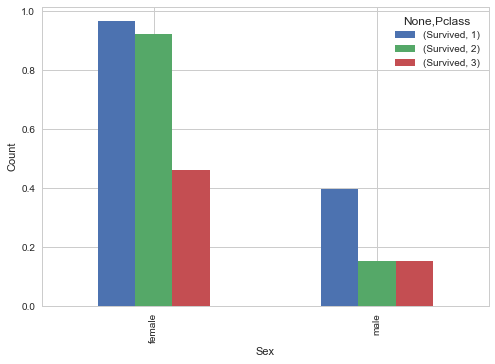

In [229]:
titanic_df.groupby(['Sex','Pclass'])[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Count')
                         

The graph above takes in a third factor, sex and shows us that there were alot more 1st class ticket holders of both sexes that survived and that Females make up a much larger number of all survivors. 

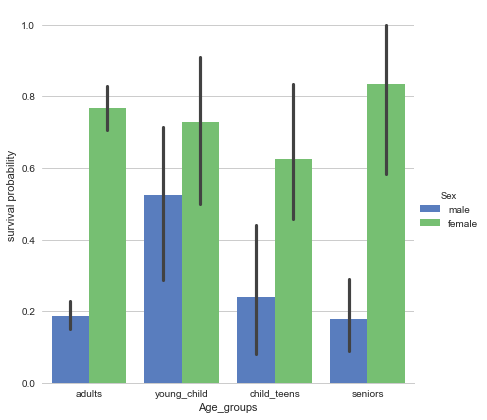

In [256]:
# getting a basic visual for the two indepenant variables Sex and class 
## had to export the csv file to the seaborn data file on my computer first

titanic_df.to_csv('out.csv', sep=',')

import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
out = sns.load_dataset("out")

# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="Age_groups", y="Survived", hue="Sex", data=out,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

The above graph shows that the rate of survival is larger for children of both sexes and women over all.

Being a child of any kind had a higher survival rate than any other male group, but that being a woman who is over 15 is actually better than being a female child.

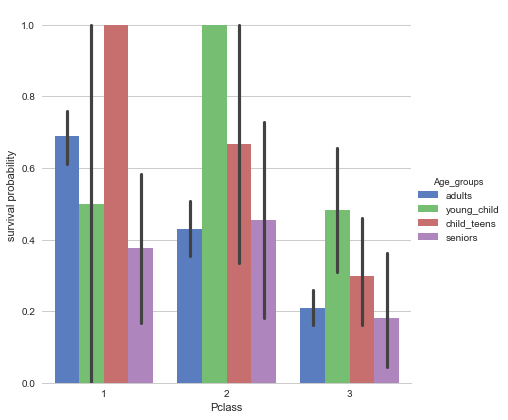

In [231]:
# getting a basic visual for the two indepenant variables Age group and class 
## had to export the csv file to the seaborn data file on my computer first

titanic_df.to_csv('out.csv', sep=',')

import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
out = sns.load_dataset("out")

# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="Pclass", y="Survived", hue="Age_groups", data=out,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

The above graph displays the survivor probability depending on age group and Pclass.  We can see that young children faired very well in both the 2 and 3rd class, but that the survival of young children in first class was very very low.  I am going to look at the counts to see if that category (1st class young children) had a small number.  This is an outlier and goes agains the general positive relationship between class and survival.  Over all, the graph supports the Chi squared tests and shows that if we are talking about survival related variables, Sex, Glass, and finally age group in that order are most closley related to survival.

In [254]:
titanic_df.groupby(['Age_groups','Pclass']).count()

PassengerId  Survived  Name  Sex  Age  SibSp  Parch  \
Age_groups  Pclass                                                        
adults      1               154       154   154  154  154    154    154   
            2               144       144   144  144  144    144    144   
            3               267       267   267  267  267    267    267   
child_teens 1                 6         6     6    6    6      6      6   
            2                 6         6     6    6    6      6      6   
            3                37        37    37   37   37     37     37   
seniors     1                24        24    24   24   24     24     24   
            2                11        11    11   11   11     11     11   
            3                22        22    22   22   22     22     22   
young_child 1                 2         2     2    2    2      2      2   
            2                12        12    12   12   12     12     12   
            3                29        29    29   29   29     29     29   

                    Ticket  Fare  Cabin  Embarked  
Age_groups  Pclass                                 
adults      1          154   154    132       153  
            2          144   144      9       144  
            3          267   267      7       267  
child_teens 1            6     6      6         6  
            2            6     6      0         6  
            3           37    37      0        37  
seniors     1           24    24     20        23  
            2           11    11      2        11  
            3           22    22      0        22  
young_child 1            2     2      2         2  
            2           12    12      4        12  
            3           29    29      3        29

Looking above, sure enough, with only two data points in the young child first class category, it is easy to see how the graph above could be misleading when talking about the survival relationship to this sub category.

Because our critical values for the chi squared test for independance of varibles, we see that sex, class, and age group observed statistical values are all well above the critical values for a one tailed 95% confidence interval.

The null hypothosis is that sex and class and age group will have no effect on survival
The alternative hypothosis is that sex, class, and age group will have a significant relationship to survival.

Therefore we reject the null hypothesis and confirm the altenative hypothosis.

We can futher infer based on the visualization of the data that of sex, female was more correlated to survival.  And, of class, higher class was related to higher survival. And, we can see that 1st and 2nd class ticket holders were more likely to survive than 3rd class, but the difference between survival rates of 1st and 2nd class ticket holders did not appear very different.  Finally, the rate of survival among the age groups appears highest for young children, and adults, but lower for children-teens and seniors.